# PART A - 30 MARKS

• DOMAIN: Telecom
    
• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# • STEPS AND TASK [30 Marks]:

#### Part 1- 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 point]

In [91]:
df_churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [92]:
#Let's quickly check the first 5 rows of df_churn1
df_churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


#### Part 1- 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 point]

In [93]:
df_churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [94]:
#Let's quickly check the first 5 rows of df_churn2
df_churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
print('There are', df_churn2.shape[0],'rows and', df_churn2.shape[1], 'columns in df_churn2 Dataframe.')

There are 7043 rows and 12 columns in df_churn2 Dataframe.


#### Part 1- 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame. [2 points]

In [96]:
#Let's merge these two dataframes
df_merge = pd.merge(df_churn1, df_churn2, on="customerID")  #customerID is common in both dataframe
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Part 1-1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python. [1 point]

In [97]:
#Here, we are comparing the columns of the original dataframes and the merged ones along with the dimensions of the dataframes (no. of columns & no. of rows).
#Original dataframe df_churn1
df_churn1.shape

(7043, 10)

In [98]:
print('There are', df_churn1.shape[0],'rows and', df_churn1.shape[1], 'columns in df_churn1 Dataframe.')

There are 7043 rows and 10 columns in df_churn1 Dataframe.


In [99]:
#Original dataframe df_churn2
df_churn2.shape

(7043, 12)

In [100]:
print('There are', df_churn2.shape[0],'rows and', df_churn2.shape[1], 'columns in df_churn2 Dataframe.')

There are 7043 rows and 12 columns in df_churn2 Dataframe.


In [101]:
#Merged dataframe
df_merge.shape

(7043, 21)

In [102]:
print('There are', df_merge.shape[0],'rows and', df_merge.shape[1], 'columns in df_merge Dataframe.')

There are 7043 rows and 21 columns in df_merge Dataframe.


#### Part 1- 2 a Impute missing/unexpected values in the DataFrame. [2 points]


In [103]:
# Let's check the missing values in the merged DataFrame i.e. df_merge
df_merge.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- As we have seen that there are no missing value present in the dataframe.

In [104]:
df_merge.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- As we have seen that column 'TotalCharges' here is object and 'MonthlyCharges' is float.
- Now the question why 'TotalCharges' is object? ..We have to look into it first.

In [105]:
df_merge.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

- 'TotalCharges' is string.We need to convert it into number. So, we are going to do that in next question of this project.
- I wil explain each and every step in next question why 'TotalCharges' is object and how can we deal with this...

In [106]:
df_merge.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

- 'MonthlyCharges' is number and seems fine.

#### Let's check any irrelevant value present in the columns


In [107]:
#Let's print unique values for all categorical columns
def print_unique_catcol_value(df):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f'{columns} : {df[columns].unique()}') 

In [108]:
print_unique_catcol_value(df_merge)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


#### DATA CLEANING

- Here, we observe 'No phone service' in Column 'MultipleLines'. So, 'No phone service' means 'No'.Here, we are going to replace 'No phone service' with 'No'.
- Here, we observe 'No internet service' in Column 'OnlineSecurity'. So, 'No internet service' means 'No'.Here, we are going to replace 'No internet service' with 'No'.
- We are doing so because we can easily replace Yes' and 'No' with 1 and 0 respectively.

In [109]:
df_merge.replace('No phone service', 'No', inplace=True)
df_merge.replace('No internet service', 'No', inplace=True)

In [110]:
print_unique_catcol_value(df_merge)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


#### Dropping column 'customerID'

- As customerID is useless when we are building machine learning model.

In [111]:
df_merge.drop('customerID', axis='columns', inplace=True)
df_merge.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Part 1-2 b Make sure all the variables with continuous values are of ‘Float’ type.[2 points]


In [112]:
#let's check datatype of variables
df_merge.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Columns SeniorCitizen, tenure are of int type.
- Column MonthlyCharges is of float type.
- Remaining columns are of object type.

In [113]:
#Now,converting all numeric variables to float and verifying.
df_merge['TotalCharges'] = df_merge['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

- When we run above command we will get an error as could not convert string to float ' '.
- As there are some blank space present in our data so, here we are supposed to use below mentioned command.

In [115]:
df1 = df_merge[df_merge.TotalCharges==' ']
df1.shape

(11, 20)

- There are 11 rows which have no data i.e. blank for col 'TotalCharges' .

In [117]:
df_merge['TotalCharges'] = pd.to_numeric(df_merge['TotalCharges'], errors='coerce')

- When we do pd.to_numeric and supply errors='coerce', it will ignore the error and  will do conversion for whatever columns and whereever it has space it will ignore and put like na.

In [118]:
#Let's check missing values in 'TotalCharges'
df_merge[pd.to_numeric(df_merge.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [119]:
#Let's check datatypes again and verify
df_merge.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- As we have seen that column 'TotalCharges' converted to float.

#### CHECK MISSING VALUES AGAIN

In [120]:
#Checking for missing values
df_merge.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- 'TotalCharges' having 11 missing records out of 7043 i.e. 0.16% only. So, we are dropping the missing records.

In [121]:
df_merge.dropna(axis = 0, inplace = True)  # Dropping null value

In [122]:
#Let's check balnk values
df_merge.eq(' ').sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [123]:
#let's check again 
df_merge.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Part 1- 2 c Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. 
#### Clearly show percentage distribution in the pie-chart. [4 points]



In [124]:
#figure = plt.figure(figsize =(7,5))
def plot_pie_chart(df):
    for columns in df:
        if df[columns].dtypes =='object':
            df[columns].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
            
            

In [ ]:
def plot_pie_chart(df):
    for columns in df:
        if df[columns].dtypes =='object':
            df[columns].value_counts().plot.pie

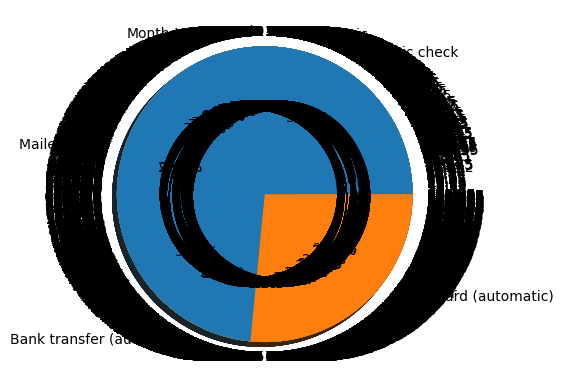

In [33]:
plot_pie_chart(df_merge)

In [34]:
- We can see that 50.5 % are male and 49.5% are female.

SyntaxError: invalid syntax (3285101307.py, line 1)


 SeniorCitizen Variable Pie Chart


<Axes: ylabel='count'>

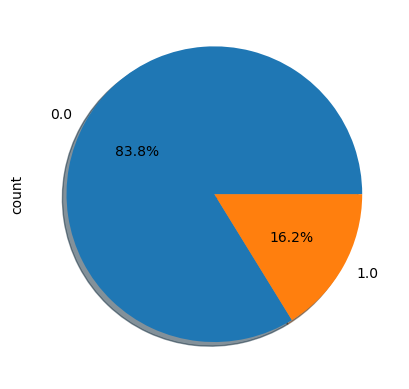

In [35]:
print('\n SeniorCitizen Variable Pie Chart')
df_merge['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

#### Part 1- 2 d.Share insights for Q2.c [2 points]

#### Part 1 - 2 e.Encode all the appropriate Categorical features with the best suitable approach.[2 points]


##### Get value counts for every column first

In [146]:
print(df_merge.gender.value_counts())
print(df_merge.SeniorCitizen.value_counts())
print(df_merge.Partner.value_counts())
print(df_merge.Dependents.value_counts())
print(df_merge.PhoneService.value_counts())
print(df_merge.MultipleLines.value_counts())
print(df_merge.InternetService.value_counts())
print(df_merge.OnlineSecurity.value_counts())
print(df_merge.OnlineBackup.value_counts())
print(df_merge.DeviceProtection.value_counts())
print(df_merge.TechSupport.value_counts())
print(df_merge.StreamingTV.value_counts())
print(df_merge.StreamingMovies.value_counts())
print(df_merge.Contract.value_counts())
print(df_merge.PaperlessBilling.value_counts())
print(df_merge.PaymentMethod.value_counts())
print(df_merge.Churn.value_counts())

AttributeError: 'DataFrame' object has no attribute 'gender'

In [127]:
column_yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for columns in column_yes_no:
    df_merge[columns].replace({'Yes':1, 'No':0},inplace=True) 

In [128]:
df_merge.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
lab encoder -gender ,SeniorCitizen, 

- Till now data seems fine.


In [129]:
#Let's do one hot encoding now
one_hot_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df_merge = pd.get_dummies(df_merge, columns=one_hot_cols,dtype = int)
df_merge.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [130]:
#Let's quickly check all columns
df_merge.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [131]:
#Let's quickly check datatypes
df_merge.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                int32
gender_Male                                  int32
InternetService_DSL                          int32
InternetService_Fiber optic    

# 2.f Split the data into 80% train and 20% test. [1 point]

In [132]:
#Splitting the data into x and y.
x = df_merge.drop('Churn', axis=1) 
x.head()   #Let's check first five rows of 'x'

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [133]:
y = df_merge["Churn"]
y.head()    #Let's check first five rows of 'y'

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify= y)

In [135]:
#Let's check split of data
print('Data in training set %.2f' %(len(x_train)/len(df_merge)*100))
print('Data in test set %.2f' % (len(x_test)/len(df_merge)*100))

Data in training set 79.99
Data in test set 20.01


In [136]:
print('Training set shape:', x_train.shape, y_train.shape)
print('Testing set shape:', x_test.shape, y_test.shape)

Training set shape: (5625, 27) (5625,)
Testing set shape: (1407, 27) (1407,)


# 2.g Normalize/Standardize the data with the best suitable approach. [2 points]

In [137]:
Columns_to_Scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_merge[Columns_to_Scale] = scaler.fit_transform(df_merge[Columns_to_Scale])

In [139]:
df_merge.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# 3.a Train a model using Decision tree and check the performance of the model on train and test data.[4 points]

#### Build Decision Tree Model

In [140]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Scoring our Decision Tree

In [141]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9976888888888888
0.7292110874200426


#### Visualizing the Decision Tree

In [105]:
#conda install python-graphviz 

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [158]:
from sklearn.tree import export_graphviz

churn_char_label = ['No', 'Yes']
Churn_Tree_File = open('churn_tree.dot','w')
dot_data = export_graphviz(dTree, out_file= Churn_Tree_File, feature_names = list(x_train), class_names = list(churn_char_label))
Churn_Tree_File.close()

In [159]:
from os import system
from IPython.display import Image

retCode = system("dot -Tpng credit_tree.dot -o churn_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("churn_tree.png"))

system command returning error: 2


# 3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

# 3.c Train a model using Random forest and check the performance of the model on train and test data.[4 points]

#### Building the model


- We are going to build Random forest classifier.
- First, let's build the model with default parameters and then will use hyperparameter tuning to optimize the model performance.
- We will calculate Accuracy, Precision and Recall.

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [148]:
Model_RF = RandomForestClassifier(random_state = 1)
Model_RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [149]:
Model_RF.score(x_train, y_train)  

0.9969777777777777

In [155]:
Model_RF.score(x_test, y_test)

0.7945984363894811

In [156]:
y_pred_rf = Model_RF.predict(x_test)

In [157]:
acc_rf = accuracy_score(y_test,y_pred_rf)
acc_rf

0.7945984363894811

In [158]:
print('Accuracy score is', accuracy_score(y_test, y_pred_rf)*100) 

Accuracy score is 79.45984363894812


In [153]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.64      0.49      0.55       366

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



#### let's balance the data and then again find the accuarcy score

In [159]:
from imblearn.over_sampling import SMOTE

In [160]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

- Here, 0 is the majority class and 1 is the minority class.


In [161]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train) #SMOTE only on train

In [162]:
y_train_res.shape

(8244,)

In [164]:
sum(y_train_res == 1), sum(y_train_res == 0)

(4122, 4122)

In [165]:
sum(y_train == 1), sum(y_train == 0)

(1503, 4122)

In [166]:
y_train.shape

(5625,)

#### Training the model again using Random forest on balanced data.

In [167]:
Model_RF_Balance = RandomForestClassifier()
Model_RF_Balance.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [168]:
Acc_RF_Balanced = Model_RF_Balance.score(x_train_res,y_train_res)  
Acc_RF_Balanced

0.9983017952450267

In [169]:
Acc_RF_Test_Balanced =  Model_RF_Balance.score(x_test, y_test)
Acc_RF_Test_Balanced

0.7810945273631841

In [170]:
y_pred_rf_balance =  Model_RF_Balance.predict(x_test)

In [171]:
print(classification_report(y_test,y_pred_rf_balance))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1041
           1       0.58      0.57      0.57       366

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



# 3.d Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
#Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(random_state = 1)  

#Grid of parameters to choose from
param = {'criterion' :['gini', 'entropy'], 
             'max_depth' : np.arange(11,19),
             'n_estimators' : [50,100,150,200], 
             'min_samples_leaf' : np.arange(5,10),
             'max_features' : np.arange(0.2, 0.7, 0.1),
             'max_samples' : np.arange(0.3, 0.7, 0.1)
         }
    
#Type of scoring used to compare parameter combinations
acc_score_gscv = metrics.make_scorer(metrics.recall_score)

#Run the grid search
rf_gscv = GridSearchCV(estimator = rf_estimator_tuned, param_grid = param, cv = 5, scoring = acc_score_gscv)
rf_gscv = rf_gscv.fit(x_train, y_train)

#Set the clf to the best combination of parameters
rf_estimator_tuned = rf_gscv.best_estimator_

#Find the best algorithm to the data
rf_estimator_tuned.fit(x_train, y_train)
    

In [ ]:
def RF_Grid_Search(x,y,nfolds):
    
    #Grid of parameters to choose from
    param = {'criterion' :['gini', 'entropy'], 
             'max_depth' : np.arange(11,19),
             'n_estimators' : [50,100,150,200], 
             'min_samples_leaf' : np.arange(5,10),
             'max_features' : np.arange(0.2, 0.7, 0.1),
             'max_samples' : np.arange(0.3, 0.7, 0.1)
            }
    
    #Choose the type of classifier
    rf = RandomForestClassifier(random_state = 1)
    
    #Run the grid search
    rf_gscv = GridSearchCV(estimator = rf, param_grid = param, cv = nfolds, scoring = 'f1')
    #rf_gscv.fit(x,y)
    rf_gscv.fit(x_train, y_train)
    
    score_gscv = rf_gscv.score(x,y)
    return rf_gscv.best_params_, rf_gscv, score_gscv

In [219]:
from sklearn.model_selection import GridSearchCV
best_params, rf_gscv, score_gscv = RF_Grid_Search(x_train_res, y_train_res, 4)
print(best_params)
acc_RF_gs = score_gscv
acc_val_RF_gs = rf_gscv.score(x_test, y_test)
pred_RF_gs = rf_gscv.predict(x_test)
f1_RF_gs = f1_score(y_test, pred_RF_gs, average = 'micro' )

{'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 100}


# 3.e Train a model using Adaboost and check the performance of the model on train and test data.[4 points]

In [205]:
from sklearn.ensemble import AdaBoostClassifier


In [208]:
Model_Ada = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
Model_Ada = Model_Ada.fit(x_train, y_train)

In [209]:
Model_Ada.score(x_train, y_train)

0.8039111111111111

In [210]:
Model_Ada.score(x_test, y_test)

0.8038379530916845

In [211]:
y_pred_ada = Model_Ada.predict(x_test)

In [212]:
acc_ada = accuracy_score(y_test,y_pred_ada)
acc_ada

0.8038379530916845

In [214]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1041
           1       0.67      0.48      0.56       366

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_ada]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

# 3.f Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f